In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic


In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_styled_landmarks(frame, results)

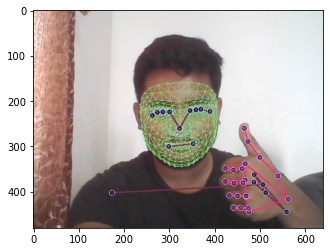

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.50598693,  0.54204541, -1.17982459, ...,  0.        ,
        0.        ,  0.        ])

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')


array([ 0.50598693,  0.54204541, -1.17982459, ...,  0.        ,
        0.        ,  0.        ])

# Setup Folders for Collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Ten videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing then Preprocess Data and Create Labels and Features

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(30, 30, 1662)

In [24]:
np.array(labels).shape

(30,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(30, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(2, 3)

# Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [33]:
res = [.7, 0.2, 0.1]

In [34]:
actions[np.argmax(res)]

'hello'

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 1.1048 - categorical_accuracy: 0.3571
Epoch 2/500
1/1 [==============================] - 0s 58ms/step - loss: 4.3458 - categorical_accuracy: 0.3571
Epoch 3/500
1/1 [==============================] - 0s 64ms/step - loss: 22.2566 - categorical_accuracy: 0.3214
Epoch 4/500
1/1 [==============================] - 0s 62ms/step - loss: 16.6877 - categorical_accuracy: 0.3214
Epoch 5/500
1/1 [==============================] - 0s 76ms/step - loss: 6.3699 - categorical_accuracy: 0.3571
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 3.1106 - categorical_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 62ms/step - loss: 5.3815 - categorical_accuracy: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 59ms/step - loss: 14.5155 - categorical_accuracy: 0.4286
Epoch 9/500
1/1 [==============================] - 0s 56ms/step - loss: 15.6032 - categorical_accuracy: 0.3214
Epoch 10

1/1 [==============================] - 0s 61ms/step - loss: 1.2372 - categorical_accuracy: 0.3214
Epoch 75/500
1/1 [==============================] - 0s 59ms/step - loss: 1.1216 - categorical_accuracy: 0.3929
Epoch 76/500
1/1 [==============================] - 0s 57ms/step - loss: 0.8190 - categorical_accuracy: 0.4643
Epoch 77/500
1/1 [==============================] - 0s 58ms/step - loss: 0.6892 - categorical_accuracy: 0.6786
Epoch 78/500
1/1 [==============================] - 0s 56ms/step - loss: 0.6054 - categorical_accuracy: 0.7857
Epoch 79/500
1/1 [==============================] - 0s 57ms/step - loss: 0.5487 - categorical_accuracy: 0.7500
Epoch 80/500
1/1 [==============================] - 0s 54ms/step - loss: 0.7166 - categorical_accuracy: 0.7500
Epoch 81/500
1/1 [==============================] - 0s 53ms/step - loss: 0.9557 - categorical_accuracy: 0.7500
Epoch 82/500
1/1 [==============================] - 0s 53ms/step - loss: 0.7653 - categorical_accuracy: 0.6786
Epoch 83/500
1

1/1 [==============================] - 0s 69ms/step - loss: 1.3455 - categorical_accuracy: 0.3214
Epoch 148/500
1/1 [==============================] - 0s 60ms/step - loss: 1.0022 - categorical_accuracy: 0.6071
Epoch 149/500
1/1 [==============================] - 0s 63ms/step - loss: 0.9805 - categorical_accuracy: 0.6429
Epoch 150/500
1/1 [==============================] - 0s 61ms/step - loss: 0.9026 - categorical_accuracy: 0.6429
Epoch 151/500
1/1 [==============================] - 0s 78ms/step - loss: 0.8420 - categorical_accuracy: 0.6429
Epoch 152/500
1/1 [==============================] - 0s 75ms/step - loss: 0.7906 - categorical_accuracy: 0.6429
Epoch 153/500
1/1 [==============================] - 0s 63ms/step - loss: 0.6578 - categorical_accuracy: 0.6429
Epoch 154/500
1/1 [==============================] - 0s 54ms/step - loss: 0.6593 - categorical_accuracy: 0.7500
Epoch 155/500
1/1 [==============================] - 0s 63ms/step - loss: 0.5879 - categorical_accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 54ms/step - loss: 0.1709 - categorical_accuracy: 0.9286
Epoch 221/500
1/1 [==============================] - 0s 53ms/step - loss: 0.1792 - categorical_accuracy: 0.9286
Epoch 222/500
1/1 [==============================] - 0s 64ms/step - loss: 0.1570 - categorical_accuracy: 0.9286
Epoch 223/500
1/1 [==============================] - 0s 67ms/step - loss: 0.1718 - categorical_accuracy: 0.9286
Epoch 224/500
1/1 [==============================] - 0s 69ms/step - loss: 0.1514 - categorical_accuracy: 0.9286
Epoch 225/500
1/1 [==============================] - 0s 58ms/step - loss: 0.1536 - categorical_accuracy: 0.9286
Epoch 226/500
1/1 [==============================] - 0s 54ms/step - loss: 0.1502 - categorical_accuracy: 0.9286
Epoch 227/500
1/1 [==============================] - 0s 54ms/step - loss: 0.1285 - categorical_accuracy: 0.9286
Epoch 228/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1306 - categorical_accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 64ms/step - loss: 0.1204 - categorical_accuracy: 0.9643
Epoch 294/500
1/1 [==============================] - 0s 58ms/step - loss: 0.1351 - categorical_accuracy: 0.9286
Epoch 295/500
1/1 [==============================] - 0s 58ms/step - loss: 0.1592 - categorical_accuracy: 0.8929
Epoch 296/500
1/1 [==============================] - 0s 67ms/step - loss: 0.1079 - categorical_accuracy: 0.9643
Epoch 297/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1691 - categorical_accuracy: 0.9643
Epoch 298/500
1/1 [==============================] - 0s 66ms/step - loss: 0.1201 - categorical_accuracy: 0.9643
Epoch 299/500
1/1 [==============================] - 0s 56ms/step - loss: 0.1021 - categorical_accuracy: 1.0000
Epoch 300/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1498 - categorical_accuracy: 0.9286
Epoch 301/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0957 - categorical_accuracy: 0.9643
Epoch 

1/1 [==============================] - 0s 55ms/step - loss: 0.0878 - categorical_accuracy: 0.9643
Epoch 367/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0713 - categorical_accuracy: 1.0000
Epoch 368/500
1/1 [==============================] - 0s 58ms/step - loss: 0.0563 - categorical_accuracy: 0.9643
Epoch 369/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0565 - categorical_accuracy: 0.9643
Epoch 370/500
1/1 [==============================] - 0s 57ms/step - loss: 0.0635 - categorical_accuracy: 1.0000
Epoch 371/500
1/1 [==============================] - 0s 57ms/step - loss: 0.0671 - categorical_accuracy: 0.9643
Epoch 372/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0558 - categorical_accuracy: 0.9643
Epoch 373/500
1/1 [==============================] - 0s 62ms/step - loss: 0.0909 - categorical_accuracy: 0.9286
Epoch 374/500
1/1 [==============================] - 0s 52ms/step - loss: 0.0978 - categorical_accuracy: 0.9643
Epoch 

1/1 [==============================] - 0s 65ms/step - loss: 0.1085 - categorical_accuracy: 0.9643
Epoch 440/500
1/1 [==============================] - 0s 58ms/step - loss: 0.1131 - categorical_accuracy: 0.9643
Epoch 441/500
1/1 [==============================] - 0s 57ms/step - loss: 0.1319 - categorical_accuracy: 0.9643
Epoch 442/500
1/1 [==============================] - 0s 54ms/step - loss: 0.1329 - categorical_accuracy: 0.9643
Epoch 443/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1050 - categorical_accuracy: 0.9643
Epoch 444/500
1/1 [==============================] - 0s 56ms/step - loss: 0.0836 - categorical_accuracy: 0.9643
Epoch 445/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0752 - categorical_accuracy: 0.9643
Epoch 446/500
1/1 [==============================] - 0s 61ms/step - loss: 0.0804 - categorical_accuracy: 0.9643
Epoch 447/500
1/1 [==============================] - 0s 66ms/step - loss: 0.0903 - categorical_accuracy: 0.9286
Epoch 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [39]:
res = model.predict(X_test)

1/1 [==============================] - 1s 630ms/step


In [52]:
actions[np.argmax(res[2])]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [51]:
actions[np.argmax(y_test[4])]

IndexError: index 4 is out of bounds for axis 0 with size 2

In [43]:
model.save('action.h8')

INFO:tensorflow:Assets written to: action.h8\assets


In [61]:
del model

In [44]:
model.load_weights('action.h5')

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [3, 0]],

       [[0, 3],
        [0, 2]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.5

In [49]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [78]:
sequence.reverse()

In [79]:
len(sequence)

30

In [80]:
sequence.append('def')

In [81]:
sequence.reverse()

In [82]:
sequence[-30:]

[array([ 0.53579575,  0.51017976, -0.8665784 , ...,  0.01411716,
         0.39881444, -0.06564225]),
 array([ 0.53932464,  0.50044692, -0.80215394, ...,  0.01912918,
         0.41487521, -0.06853848]),
 array([ 0.54521167,  0.49280342, -0.92243701, ...,  0.09432524,
         0.40313488, -0.05057184]),
 array([ 0.5449869 ,  0.48842537, -0.83560973, ...,  0.18224087,
         0.42446244, -0.03113327]),
 array([ 0.5467549 ,  0.48549351, -0.82812798, ...,  0.22927114,
         0.43025249, -0.03556988]),
 array([ 0.54835027,  0.48526776, -1.01701093, ...,  0.11937112,
         0.40644181, -0.08085665]),
 array([ 0.54761034,  0.4854863 , -1.00790012, ...,  0.0569848 ,
         0.41502285, -0.10961011]),
 array([ 0.54700869,  0.48564678, -1.00324333, ...,  0.04685949,
         0.46029526, -0.08660015]),
 array([ 0.55071372,  0.48572308, -1.34791791, ...,  0.1091544 ,
         0.51242614, -0.12059939]),
 array([ 0.546323  ,  0.49073651, -1.1162703 , ...,  0.46359152,
         0.60664093, -0.08

In [53]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'media

In [83]:
res[np.argmax(res)] > threshold

False

In [84]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [54]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 18ms/step


array([[5.5841130e-01, 1.6022685e-04, 4.4142839e-01]], dtype=float32)